In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [2]:
os.system("rm -r graphs parameters")

0

In [3]:
!mkdir graphs parameters

## The datafiles are located in /opt/qcdnum-17-01-14/output/

In [4]:
#def x_pdf_original(x, A, B, C , D, E, F, G,H):
#    return A*(x+1)**B*(-x)**C*(1 + (D*(x+1)) + (E*(x+1)**2) + F*np.log(x+1) + G*np.log(x+1)**2)+H

In [5]:
def x_pdf(x, A, B, C , D, E, F, G):
    return A*x**B*(1-x)**C*(1 + D*x + E*x**2 + F*np.log(x) + G*np.log(x)**2)

In [6]:
#change of variable
#def x_pdf(x, A, B, C , D, E, F, G,H):
#    u = np.log(x)
#    return A*np.exp(B,u)*(1-np.exp(u))**C *(1 + D*np.exp(u) + E*(np.exp(u))**2 + F*u + G*u**2)

In [7]:
initial_conditions = pd.DataFrame(
    {
      #            A         ,  B  ,    C ,  D  ,  E ,  F    ,   G
      'uv':[10.19304899633023, 0.76,   4.6, 0.0 , 2.6, 0.35  , 0.049],
     'dv': [5.564255181349489, 0.99,   4.7, 0.0 , 0.0, 0.0   , 0.0],
     'ubar':[    0.14        , -0.33,  11 , 18  , 0.0, 0.071 , 0.0],
     'dbar':[    0.14        , -0.33,  24 , 38  , 0.0, 0.071 , 0.0],
     'gl':[0.872978687751462, -0.52,  4.5, 0.0 , 0.0, 0.217 , 0.0112]
    }
)
# A_dbar, B_dbar, C_dbar, D_dbar, F_dbar = 0.14, -0.33, 24, 38, 0.071 

In [8]:
initial_conditions

,uv,dv,ubar,dbar,gl
0,10.193049,5.564255,0.140,0.140,0.872979
1,0.760000,0.990000,-0.330,-0.330,-0.520000
2,4.600000,4.700000,11.000,24.000,4.500000
3,0.000000,0.000000,18.000,38.000,0.000000
4,2.600000,0.000000,0.000,0.000,0.000000
5,0.350000,0.000000,0.071,0.071,0.217000
6,0.049000,0.000000,0.000,0.000,0.011200


/tmp/ipykernel_22828/630181234.py:2: RuntimeWarning: divide by zero encountered in power
  return A*x**B*(1-x)**C*(1 + D*x + E*x**2 + F*np.log(x) + G*np.log(x)**2)
/tmp/ipykernel_22828/630181234.py:2: RuntimeWarning: divide by zero encountered in log
  return A*x**B*(1-x)**C*(1 + D*x + E*x**2 + F*np.log(x) + G*np.log(x)**2)
/tmp/ipykernel_22828/630181234.py:2: RuntimeWarning: invalid value encountered in multiply
  return A*x**B*(1-x)**C*(1 + D*x + E*x**2 + F*np.log(x) + G*np.log(x)**2)


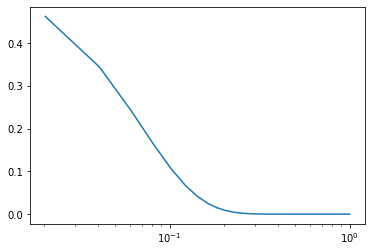

In [9]:
#x_init = 5.2427e-4
x_init = 0
x = np.linspace(x_init,1)
y = x_pdf(x, *initial_conditions['dbar'])

plt.figure()
plt.xscale("log")
plt.plot(x,y)

In [10]:
directories = initial_conditions.columns
for d in directories:
    os.mkdir(f'graphs/{d}')

In [11]:
initial_conditions.to_csv('parameters/0.csv', index=False)

In [12]:
data_paths = glob.glob('/opt/qcdnum-17-01-14/output/*.csv')

In [13]:
data_paths

['/opt/qcdnum-17-01-14/output/pruebaCxx_q_2.560000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_140.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_5.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_70.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_170.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_40.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000000.000000.csv',
 '/opt/qcdnum-17-01-14/out

In [14]:
# excluding the initial energy file
data_paths = data_paths[1:]
data_paths

['/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_140.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_5.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_70.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_170.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_40.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_5000.000000.csv',
 '/opt/qcdnum-17-01-14/

In [15]:
def get_q2_from_file_path(x):
    q2 = x.split('/')[-1]
    q2 = q2.replace('pruebaCxx_q_','').replace('.csv','').split('.')[0]

    return int(q2)

In [16]:
data_paths=sorted(data_paths, key=get_q2_from_file_path, reverse=False)
data_paths

['/opt/qcdnum-17-01-14/output/pruebaCxx_q_5.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_40.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_70.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_140.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_170.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_5000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000000000.000000.csv',
 '/opt/qcdnum-17-01-14/output/p

In [17]:
# initial old parameter file path
old_parameters_file_path = 'parameters/0.csv'

for k, file_path in enumerate(data_paths):
    print(100*k/len(data_paths), '%')
    
    print(file_path)
    q2 = get_q2_from_file_path(file_path)
    print(q2)
    initial_conditions=pd.read_csv(old_parameters_file_path)
    data = pd.read_csv(file_path, delimiter=' ')
    title_data = data.columns[1:]
    fitted_conditions = {}

    for i, parameter in enumerate(initial_conditions.columns):
        #print(parameter)
        y = data['x'+parameter]
        x = data['x']
        #print(parameter)
    
        try:
            initial_parameters = initial_conditions[parameter]
            fitted_parameters,_= curve_fit(x_pdf,x,y, p0=initial_parameters, maxfev=1000)
            fitted_conditions[parameter] = fitted_parameters
            plt.figure()
            plt.plot(x,y, label = 'data')
            plt.plot(x,x_pdf(x,*fitted_parameters), label='fit', alpha = 0.5)
            plt.plot(x,x_pdf(x,*initial_parameters), label='initial', alpha = 0.5)
            plt.ylim(-0.1,1.1)
            plt.xscale("log")
            plt.legend()
            #plt.ioff()
            image_name = f'graphs/{parameter}/q2_{q2}_param_{parameter}.png'
            plt.savefig(image_name)
            plt.close()

        except:

            for j in range(10):
                rango = 3
                variation = np.random.random(7)*rango - rango
                initial_parameters = initial_conditions[parameter]
                initial_parameters_variados = initial_conditions[parameter] + variation

                try: 
                    fitted_parameters,_= curve_fit(x_pdf,x,y, p0=initial_parameters_variados, maxfev=1000)
                    fitted_conditions[parameter] = fitted_parameters
                    #print('parametros encontrados!')
                    plt.figure()
                    plt.plot(x,y, label = 'data')
                    plt.plot(x,x_pdf(x,*fitted_parameters), label='fit', alpha=0.5)
                    plt.plot(x,x_pdf(x,*initial_parameters), label='inicial', alpha=0.5)
                    #plt.ylim(-0.1,1.1)
                    plt.legend()
                    plt.xscale("log")
                    #plt.ioff()
                    image_name = f'graphs/{parameter}/q2_{q2}_param_{parameter}.png'
                    plt.savefig(image_name)
                    plt.close()
                    with open('problemas.txt', 'a') as f:
                        f.write(f'El parametro {parameter} de los datos {file_path} se logró fittear, pero con algunos problemas, revisar la imagen {image_name}\n')
                    break
                except:
                  #print('No se encontraron los parametros en la iteracion {}'.format(j))
                    if j==9:
                        with open('problemas.txt', 'a') as f:
                            f.write(f'No se logro fittear la funcion para el parametro {parameter} de los datos {file_path}\n')
                        fitted_conditions[parameter] = [0]*7

    fitted_conditions = pd.DataFrame(fitted_conditions)
    fitted_conditions.to_csv(f'parameters/{q2}.csv', index=False)
    old_parameters_file_path = f'parameters/{q2}.csv'

0.0 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_5.000000.csv
5
5.882352941176471 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_10.000000.csv
10
11.764705882352942 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_40.000000.csv
40
17.647058823529413 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_70.000000.csv
70
23.529411764705884 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_100.000000.csv
100
29.41176470588235 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_140.000000.csv
140
35.294117647058826 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_170.000000.csv
170
41.1764705882353 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_1000.000000.csv
1000
47.05882352941177 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_5000.000000.csv
5000
52.94117647058823 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv
7000
58.8235294117647 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_10000.000000.csv
10000
64.70588235294117 %
/opt/qcdnum-17-01-14/output/pruebaCxx_q_100000.000000.csv
100000
70.58823529411765 %
/opt/qcdnum-17-01-14/output/pruebaCxx_

In [18]:
from playsound import playsound
#playsound("/home/angelica/Downloads/Creepy-background-music/Creepy-background-music.mp3")
print("Done :)")

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv', delimiter=' ')

In [ ]:
data.head()

In [ ]:
q2 = get_q2_from_file_path('/opt/qcdnum-17-01-14/output/pruebaCxx_q_7000.000000.csv')
print(q2)
old_parameters_file_path = 'parameters/0.csv'
initial_conditions=pd.read_csv(old_parameters_file_path)
initial_conditions = pd.read_csv('parameters/0.csv')
fitted_conditions = {}
for i, parameter in enumerate(initial_conditions.columns):
    print(parameter)
    y = data['x'+parameter]
    x = data['x']
    print(parameter)

    initial_parameters = initial_conditions[parameter]
    fitted_parameters,_= curve_fit(x_pdf,x,y, p0=initial_parameters, maxfev=3000)
    fitted_conditions[parameter] = fitted_parameters
    plt.figure()
    plt.plot(x,y, label = 'data')
    plt.plot(x,x_pdf(x,*fitted_parameters), label='fit')
    plt.plot(x,x_pdf(x,*initial_parameters), label='initial')
    plt.ylim(-0.1,1.1)
    plt.xscale("log")
    plt.legend()
    #plt.ioff()
    image_name = f'graphs/{parameter}/q2_{q2}_param_{parameter}.png'
    plt.title(parameter)
    #plt.savefig(image_name)
